
    
  # DSP: Underlying Concepts

    
## William Eustace M0WJE
## m0@wje.io
    


# What is a signal?

* For our purposes: a time-varying function $f(t)$.
* Analogue or digital?
* Discrete or continuous?




# Essential Concepts


* A **sum**: \begin{equation} \sum_{n=0}^{M} f(nT)\end{equation}
    
* An **integral**: \begin{equation} \int_{-\pi}^{\pi} f(t) dt \end{equation} 

* A **sum** which (**under some conditions**) _converges_ to an **integral**<sup>1</sup>: \begin{equation} \lim_{\delta T \to 0}( \sum_{n} f(n \delta T) \delta T ) = \int f(t) dt \end{equation} 

    
    
 

 
<sup>1</sup>This is a Riemann integral. Thankfully this is all most of us will ever need...

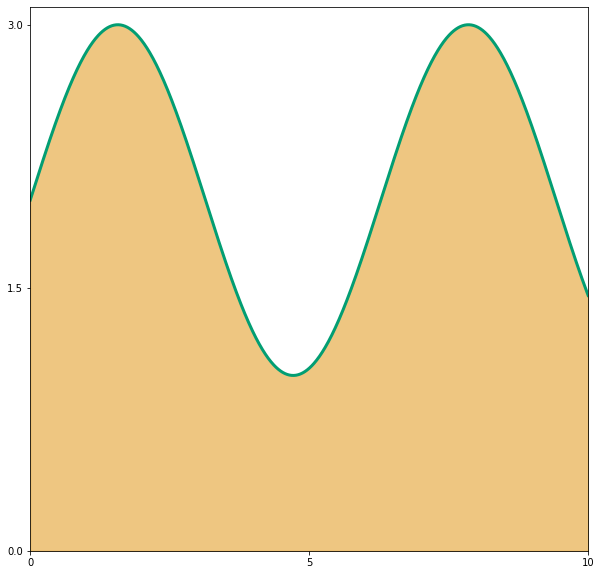

In [1]:
%reset -f
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=3,color=colour_palette[2],linestyle='-')
plt.fill_between(t,0,s,alpha=0.5,color=colour_palette[1])
plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

$$f(t) = sin(t) + 2$$

The integral: $$\int_0^{10} f(t) dt $$
is just the area under this curve. We can also approximate this by a sum: 


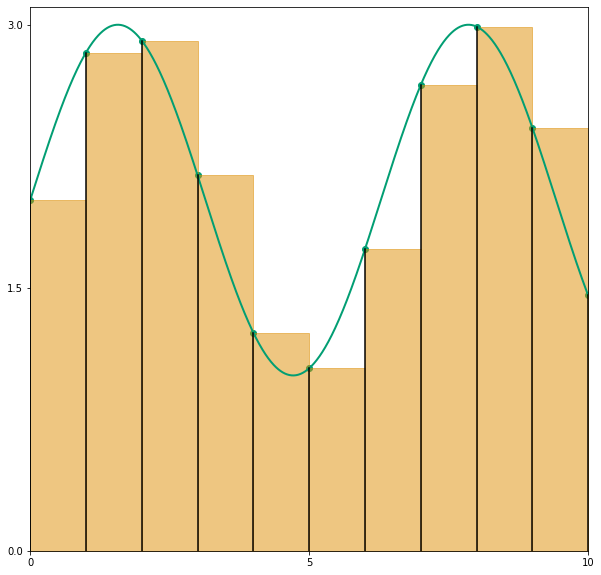

In [2]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=2,color=colour_palette[2],linestyle='-')
t_points = np.linspace(0,10,11)
s_points = np.sin(t_points)+2
plt.scatter(t_points,s_points,color=colour_palette[2])
for (x,y) in zip(t_points,s_points):
    plt.plot([x,x],[0,y],color='black')
    plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

(with $\delta T =1$) 
$$\sum_{n=0}^{10} 1 \times f(n \times 1) $$

Now, intuitively it seems that as $\delta T \to 0$, we get a better estimate of the area: when we get to an infinitesimal $\delta T$, we obtain the integral. 


# Waterfalls & Hotplates
* Probably all have heard of the Fourier Transform and seen a waterfall display like this; do you know why it works? 
<center>
<img src="GEO_MFSK22.png" />
<img src="ET_20m.png" width=800px />
</center>

(images from George M1GEO and John M5ET respectively)



* A common goal in computing the Fourier **transform** is to determine how much energy/signal there is at a given frequency. We will fudge our way into this by starting from the basics...

# Towards Fourier Space
* Ways of approximating a function: Taylor Series
\begin{equation}f(t) \approx a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ... \rm{for\ some\ }a_i\end{equation} 


* But what if we want to represent a **periodic** function? We might try <sup>1</sup> 

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 

<sup>1</sup> Advanced students should explain to their neighbours in the next break why we need both sine and cosine terms here.

This is a _Fourier Series_. How do we find $a_i$ and $b_i$? __Orthogonality of sines__

\begin{equation}\int_{-\pi}^\pi sin(m x) sin(n x) dx = \begin{cases} 
\pi & \forall m=n : m \in \mathbb{Z}\\
0 & \text{otherwise}
\end{cases}\end{equation}
(and the same is true for cos, I promise!)
\begin{equation}\int_{-\pi}^\pi sin(m x) cos(n x) dx = 0 \ \forall  m,n \in \mathbb{Z} \end{equation}

## Orthogonality of Sines

In [8]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[10,10]
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,2)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.sin(x)
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
    plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    product = y_1 * y_2
    
    plt.plot(x,product,color=colour_palette[2],lw=3.0)
    plt.fill_between(x,0,product,color=colour_palette[2],lw=3.0)
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))

# mpld3.display(fig)
print()


interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

* Why does this help us?

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 
$$ a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(n t) dt $$
$$ b_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) cos(n t) dt $$

(plus a DC offset...)

\begin{equation} c = \int_{-\pi}^{\pi} f(t) dt \end{equation}



## An example: the square wave


* This is a carefully chosen example: why?


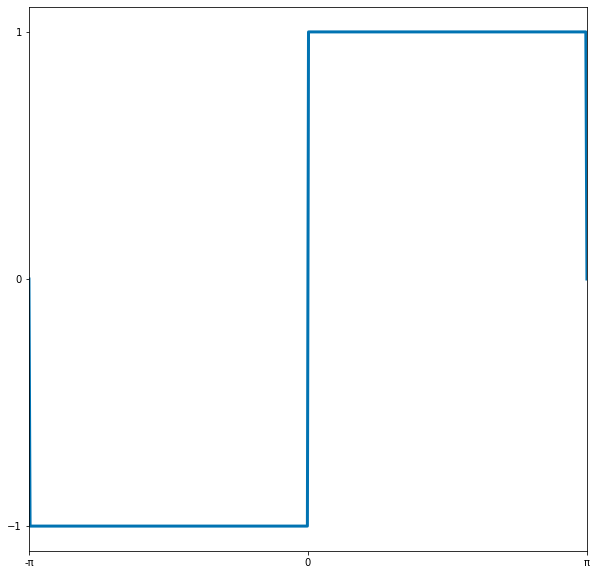

In [9]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


colour_palette = sns.color_palette("colorblind",3)

x = np.linspace(-np.pi,np.pi,500)

plt.xlim(-np.pi,np.pi)

plt.yticks([-1,0,1])
plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
y_1 = np.where(x<0,-1.0,1.0)
y_1[0] = 0
y_1[-1]=0
plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
print()

* Sine series only: there is __no__ DC offset and __no__ cosine term. (those advanced students can discuss this later too)



## Calculating the coefficients


$$a_1 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(t) dt + \int_{0}^\pi 1 sin(t) dt \right] = \frac{4}{\pi}$$

In [5]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,2)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    product = y_1 * y_2
    
    plt.plot(x,product,color=colour_palette[2],lw=3.0)
    plt.fill_between(x,0,product,color=colour_palette[2],lw=3.0)
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

$$a_2 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(2t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(2t) dt + \int_{0}^\pi 1 sin(2t) dt \right] = 0$$


$$a_3 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(3t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(3t) dt + \int_{0}^\pi 1 sin(3t) dt \right] = \frac{4}{3\pi}$$


(...many hours later...)

(an identity that makes it much easier!)
$$ \int_a^b sin(nt) dt = -\frac{1}{n} \left[cos(nt)\right]^b_a$$
$$cos(n \pi) = \begin{cases}
 0 & \text{even} \ n \\
1 & \text{odd}\  n
\end{cases}$$

Skipping some algebra (if you enjoy that sort of thing, fair enough...)
$$a_n = \begin{cases}
0 & \text{even n}\\
\frac{4}{n \pi} & \text{odd n}
\end{cases}
$$

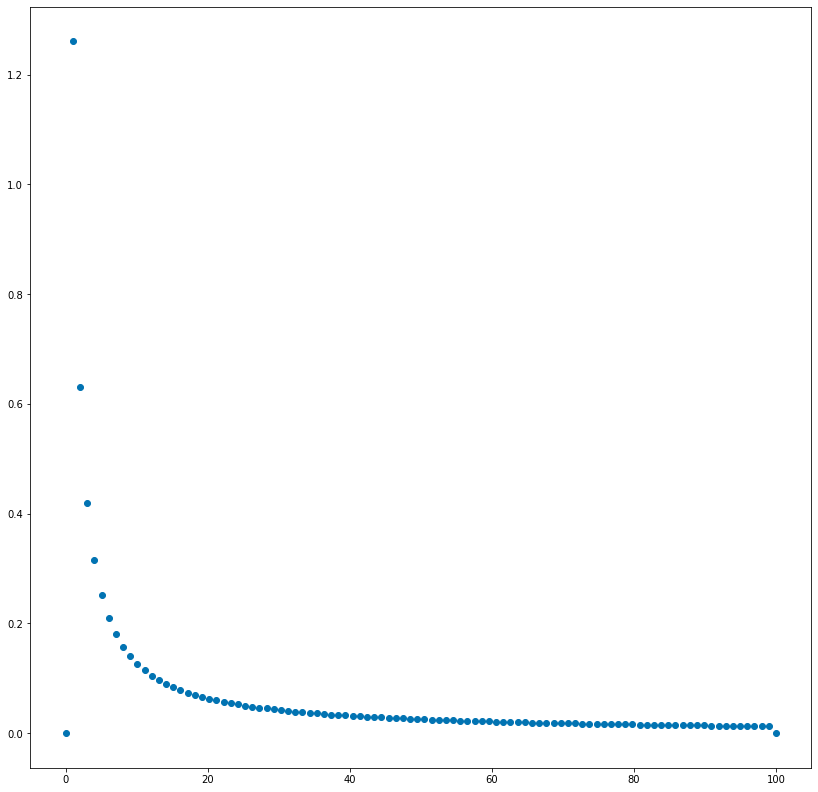

In [6]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


colour_palette = sns.color_palette("colorblind",3)

x = np.linspace(0,100,100)
y= np.where(x%2==0,0,4/(x*np.pi))



# plt.yticks([-1,0,1])
plt.scatter(x,y,color=colour_palette[0])

print()

In [7]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    bases = np.linspace(1,m,m)
    
    sin_coefficients = np.where(bases%2==0,0,4 /(bases*np.pi)) 
    sinusoids = np.sin(x*np.reshape(bases,(-1,1)))
    y_2 = np.sum(np.reshape(sin_coefficients,(-1,1))*sinusoids,axis=0)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,21,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=11, description='m', max=21, min=1), Output()), _dom_classes=('widget-in…

# Something I never told you
### (I'm sorry)

$$ i = \sqrt{-1}$$
$$ i^2 = -1$$

$$ e ^ {i \theta} = cos(\theta) + i sin(\theta)$$




In [ ]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


colour_palette = sns.color_palette("colorblind",3)

x = np.linspace(0,100,100)
y= np.where(x%2==0,0,4/(x*np.pi))



# plt.yticks([-1,0,1])
plt.scatter(x,y,color=colour_palette[0])

print()

# The Fourier Transform

This is the 
